<h1>$ e^{j \omega t} = \cos (\omega t) + j \sin(\omega t) $</h1>

### LTI system
 1) linear system <br>
 $ S(x_1) = y_1 $ <br><br>
 $ S(x_2) = y_2 $ <br><br>
 $ x_1 + x_2 \rightarrow y-1 + y_2 $ <br><br>
 $ \alpha x_1 \rightarrow \alpha y_1$ <br><br>
 $ \Rightarrow S(x_1 + x_2) = y_1 + y_2 = S(x_1) + S(x_2)$ <br><br>
 $ S( \alpha x_1) = \alpha y_1 = \alpha S(x_1)$
 

2) time invariant (시불변) → 겉모습은 변하지만 본질은 안변함. <br>
$ S(x_1 ( t - \tau ) = y_1 ( t - \tau)$ <br>

### ▶ 두가지를 만족 시키는 것이 LTI (Linear Time Invariant

![01](img/210912/01.png)

<h3>$$ x(t) = \int_{-\infty}^{ \infty } x(\tau) \delta ( t - \tau) d \tau \rightarrow \Box \rightarrow y(t) 
= \int_{-\infty}^{ \infty} x(\tau) h ( t - \tau) d \tau $$ <br></h3>
<h3>$$ y(t) = (x * h) (t) $$ </h3>

![02](img/210912/02.png) <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.integrate import odeint
from IPython.display import Image

![03](img/210912/03.png) <br>

<h3>$Vi(t) = L \frac{di}{dt} + Ri$<br><br>
$V(s) = LsI + RI$<br><br>
$\frac{I}{V} = \frac{1}{R+SL}$<br><br>
$H(S) \frac {Vo}{Vi} = \frac{R}{R+SL} = \frac{\frac{R}{L}}{S + \frac{R}{L}}$<br><br>
$h(t) = \frac {R}{L}e^{-\frac{R}{L}t}1(t)$<br></h3>

In [3]:
L = 1
R = 1

In [4]:
t = np.linspace(0, 10, 1000)

In [5]:
def vi(t):
    s = 1000
    return s * (np.heaviside(t, 0) - np.heaviside( t-1/s, 0))

In [6]:
def dvo_dt(vo, t, vi):
    return -vo + vi(t)

In [7]:
vo = odeint(dvo_dt, 0, t, args=(vi,))

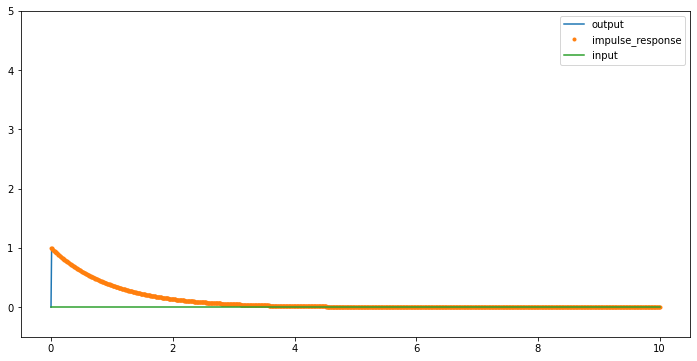

In [8]:
plt.figure( figsize=(12,6))
plt.plot(t, vo, label = 'output')
plt.plot(t, np.exp(-t), '.', label='impulse_response')
plt.plot(t, vi(t), label='input')
plt.ylim([-0.5, 5])
plt.legend()

In [9]:
def h(t):
    return np.exp(-t) * np.heaviside(t, 0)

<h3>$Vo(t) = Ae^{-t} + \frac{1}{2} \cos t + \frac{1}{2} \sin t $<br><br>
$\quad = -\frac{1}{2}e^{-t} + \frac{1}{2} \cos t + \frac{1}{2} \sin t $<br><br>
$ \qquad h(t) = e^{-t} 1(t)$<br><br>
$\qquad cos(t)1(t) * e^{-t} 1(t)$<br></h3>

In [10]:
def vi(t):
    return np.cos(t) * np.heaviside(t, 0)

In [11]:
vo = odeint(dvo_dt, 0, t, args = (vi,))

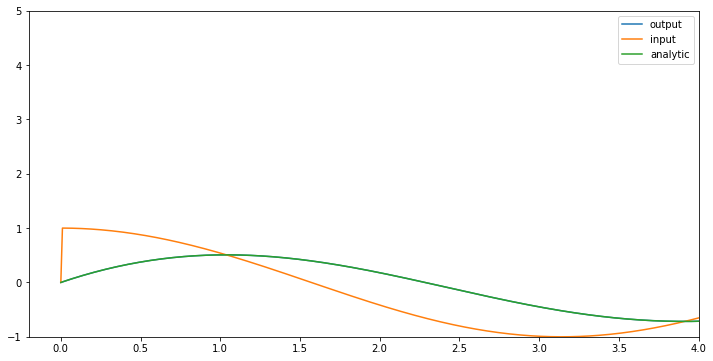

In [12]:
plt.figure( figsize=(12,6))
plt.plot(t, vo, label = 'output')
plt.plot(t, vi(t), label='input')
plt.plot(t, -0.5 * np.exp(-t) + 0.5 * np.cos(t) + 0.5 * np.sin(t), label='analytic')
plt.ylim([-1, 5])
plt.xlim([-0.2, 4])
plt.legend()

 <h3>$h(t) = \int_{0}^{t} \cos (t - \tau) e^{-\tau}d \tau $<br><br>
 $\quad=  \int_{0}^{t} \cos t \cdot \cos \tau \cdot e^{-\tau}d \tau + \int_{0}^{t} \sin t \cdot \sin \tau \cdot e^{-\tau}d \tau$</h3>

In [13]:
def convultion(t):
    y = np.zeros_like(t)
    for idx, x in enumerate ( t):
        y[idx] = np.cos(x) * scipy.integrate.quad( lambda t : np.exp(-t) * np.cos(t), 0, x)[0] \
            + np.sin(x) * scipy.integrate.quad( lambda t : np.exp(-t) * np.sin(t), 0, x)[0]
    return y

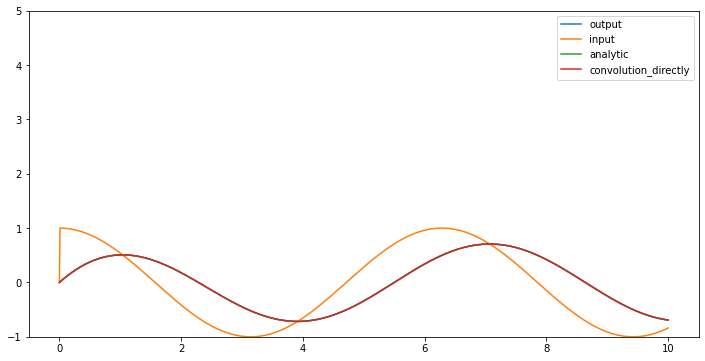

In [14]:
plt.figure( figsize=(12,6))
plt.plot(t, vo, label = 'output')
plt.plot(t, vi(t), label='input')
plt.plot(t, -0.5 * np.exp(-t) + 0.5 * np.cos(t) + 0.5 * np.sin(t), label='analytic')
plt.plot(t, convultion(t), label = 'convolution_directly')
plt.ylim([-1, 5])
plt.legend()

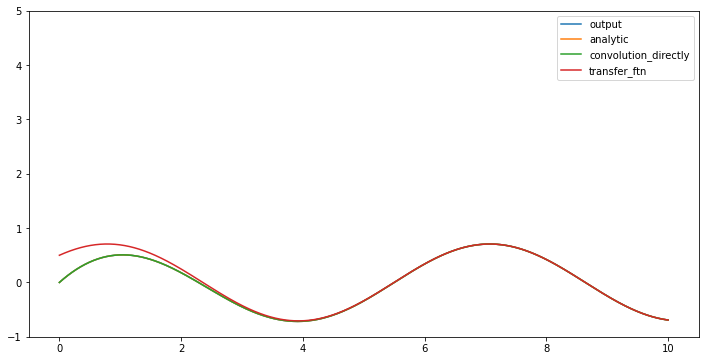

In [15]:
plt.figure( figsize=(12,6))
plt.plot(t, vo, label = 'output')
plt.plot(t, -0.5 * np.exp(-t) + 0.5 * np.cos(t) + 0.5 * np.sin(t), label='analytic')
plt.plot(t, convultion(t), label = 'convolution_directly')
plt.plot(t, np.cos(t-np.pi/4)/np.sqrt(2), label = 'transfer_ftn')
plt.ylim([-1, 5])
plt.legend()

<h3>$y(t) = \int \cos(\omega \tau)h(t-\tau)d \tau$<br><br>
$\quad=\int \cos(\omega (t - \tau))h(\tau)d \tau$<br><br>
$\quad= \int \cos(\omega \tau) \cos(\omega t)h(\tau)d \tau + \int \sin(\omega \tau) \sin(\omega t)h(\tau)d \tau$<br><br>
$\quad=\cos(\omega t) \int \cos(\omega \tau) h(\tau)d \tau + \sin(\omega t) \int \sin(\omega \tau) h(\tau)d \tau$<br><br>
$\quad= A \cos(\omega t) + B \sin(\omega t) = \sqrt{A^2 + B^2} \cos (\omega t + \theta)$<br></h3>

![04](img/210912/04.png)

<h3>$H(j\omega) e^{j \omega t} = \mid H(j\omega) \mid e^{j \angle H(j \omega ) }e^{j \omega t} = \mid H(j\omega) \mid e^{j(\omega t + \angle H(j \omega))}$<br><br>
$\qquad=\mid H(j\omega) \mid \cos (\omega t + \angle H (j \omega)) + j \mid H(j\omega) \mid \sin (\omega t + \angle H (j \omega))$</h3>

 <h2>
 1. LTI 정의 <br>
 2. y(t) = (x * h)(t) <br>
 3. cos(wt) -> □ -> .... 진폭, 위상<br>
 4. cos(wt) -> □ -> |H(jw) cos(wt + H(jw)) <br>
 5. e^jwt -> □ -> H(jw)e^jwt
    </h2>